In [6]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [7]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [8]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [9]:
# Get only the cubes that have our line of interest in them
mol_tag = 33004
catalog = 'JPL'
mol_str = f'null'
cubes, tbl = fetch_cubes(cubefns, catalog=catalog, mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=42>
   FREQ      ERR     LGINT    DR     ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz    MHz nm2         1 / cm                                     
 float64   float64  float64 int64  float64  int64 int64 int64   str8     str8  
---------- -------- ------- ----- --------- ----- ----- ----- -------- --------
85600.0088   0.0073  -4.951     3   46.9014    13 33004  1404  6 2 4 1  6 1 6 2
85604.2124 999.9999 -8.7671     3  706.1921    39 33004  1404 1912 7 2 2012 9 1
85604.2124 999.9999 -8.7671     3  706.1921    39 33004  1404 1912 8 2 2012 8 1
85676.1804   0.0099 -6.4869     3  277.7795    37 33004  1404 18 315 0 17 414 1
85789.2342 999.9999 -8.7521     3  846.8595    41 33004  1404 2015 5 1 2114 8 1
85789.2342 999.9999 -8.7521     3  846.8595    41 33004  1404 2015 6 1 2114 7 1
85841.9409   0.0097 -7.6614     3  191.8708    29 33004  1404 14 312 2 15 114 1
 85893.968   0.0086 -8.7079     3  147.3247    27 33004  1404 13 113 2 12 3 9 1
85993.9067   0.0088 -

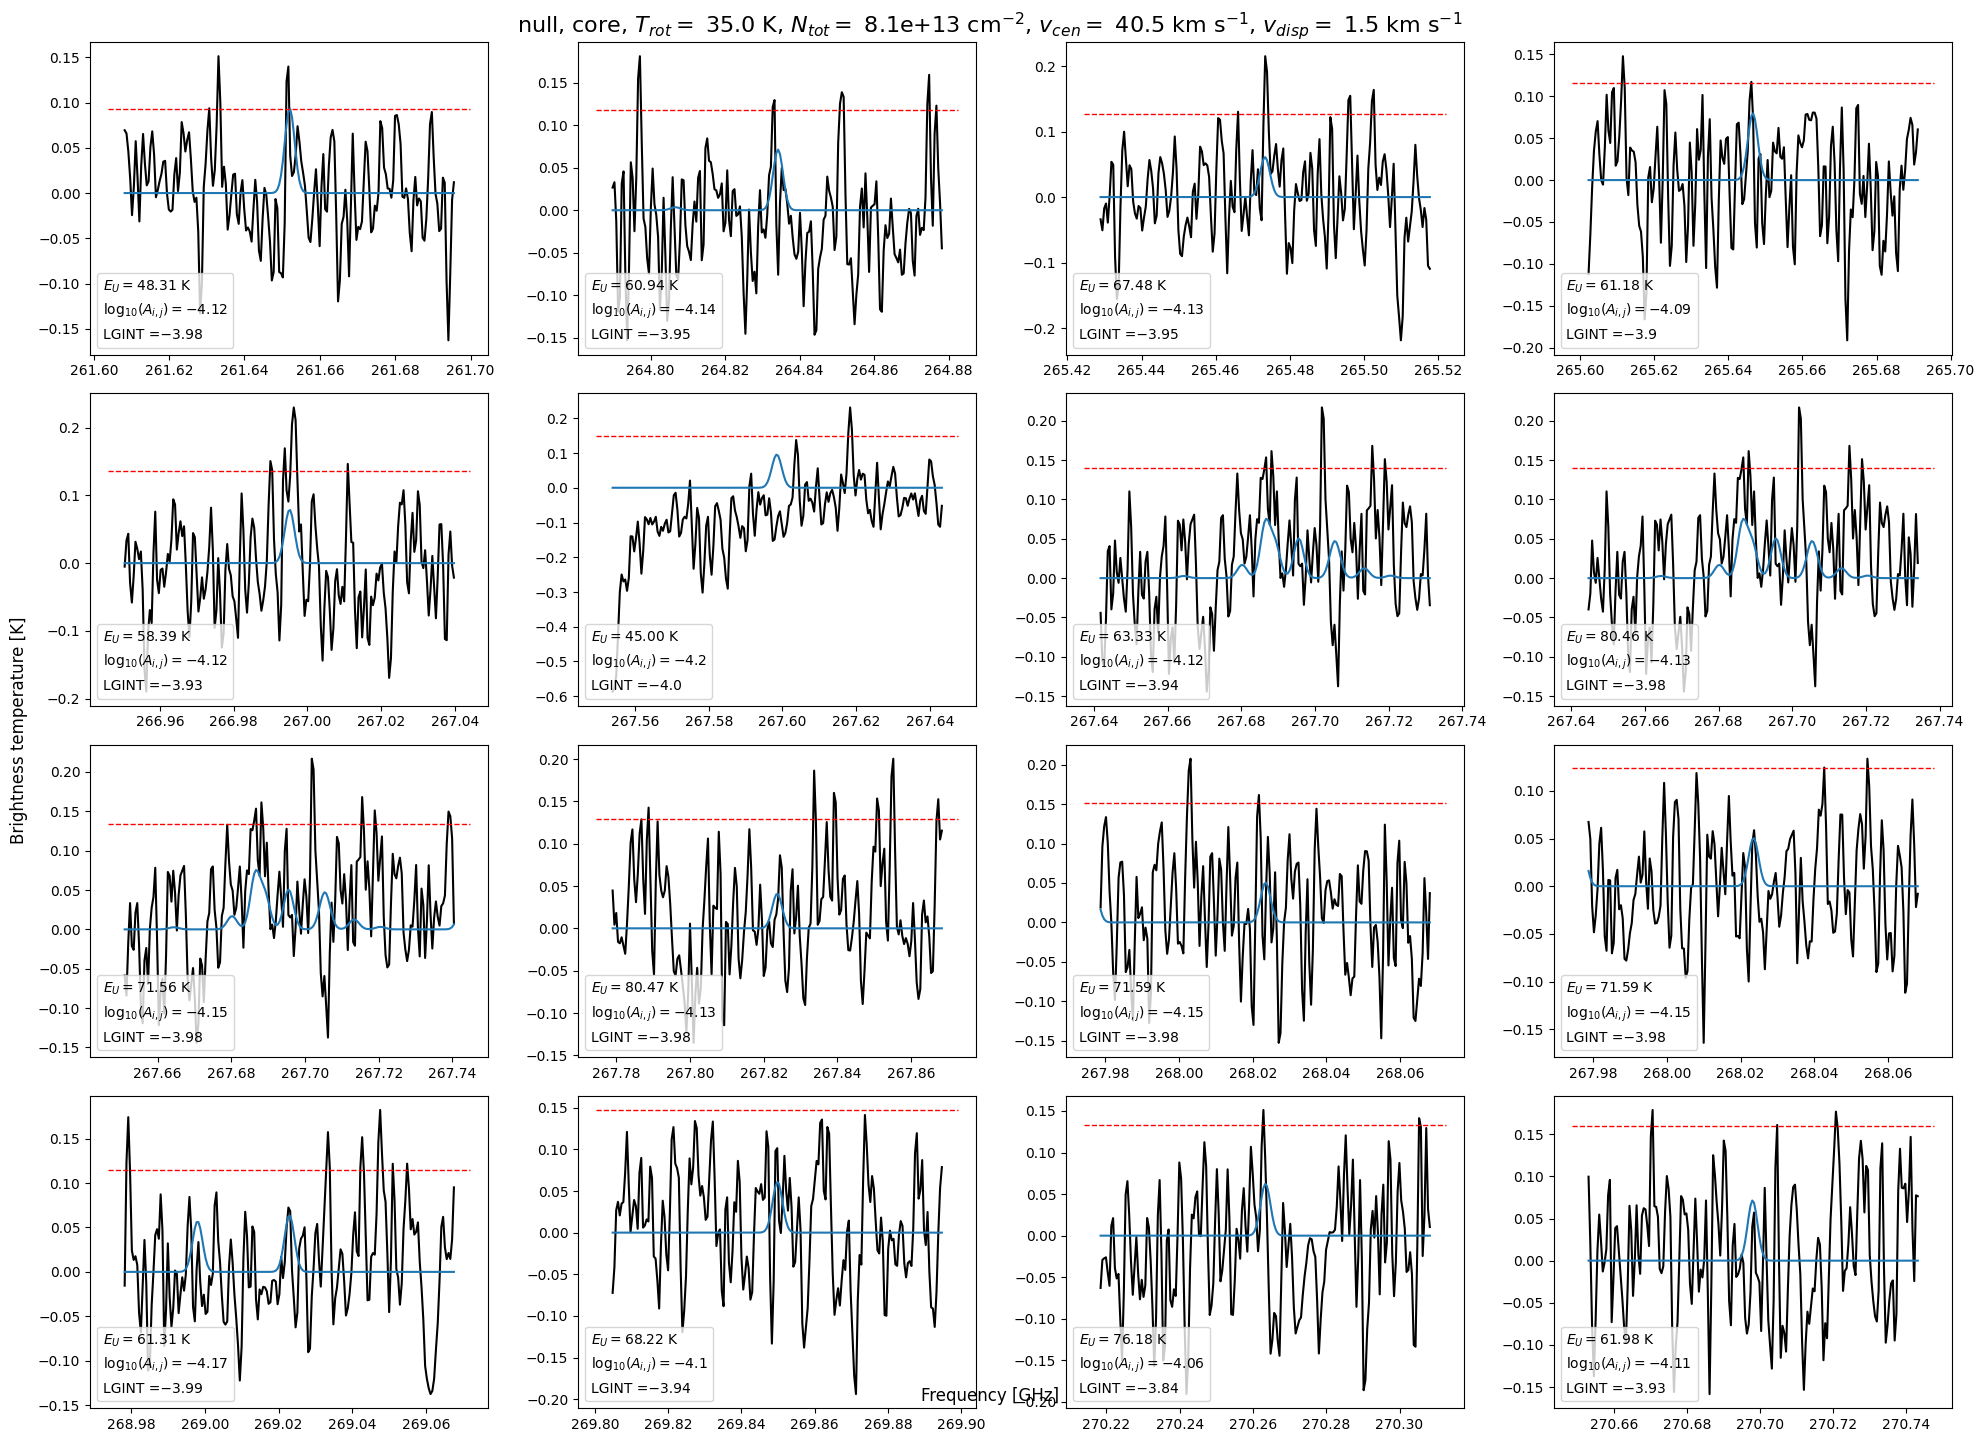

In [22]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 35., N_tot = 8.1e+13, v_cen = 40.5*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=15,
               nrows=4, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=mol_str, extr_type="coord", crd=crd,
               show_2_sigma=True, LGINT_cutoff=-4)

In [23]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

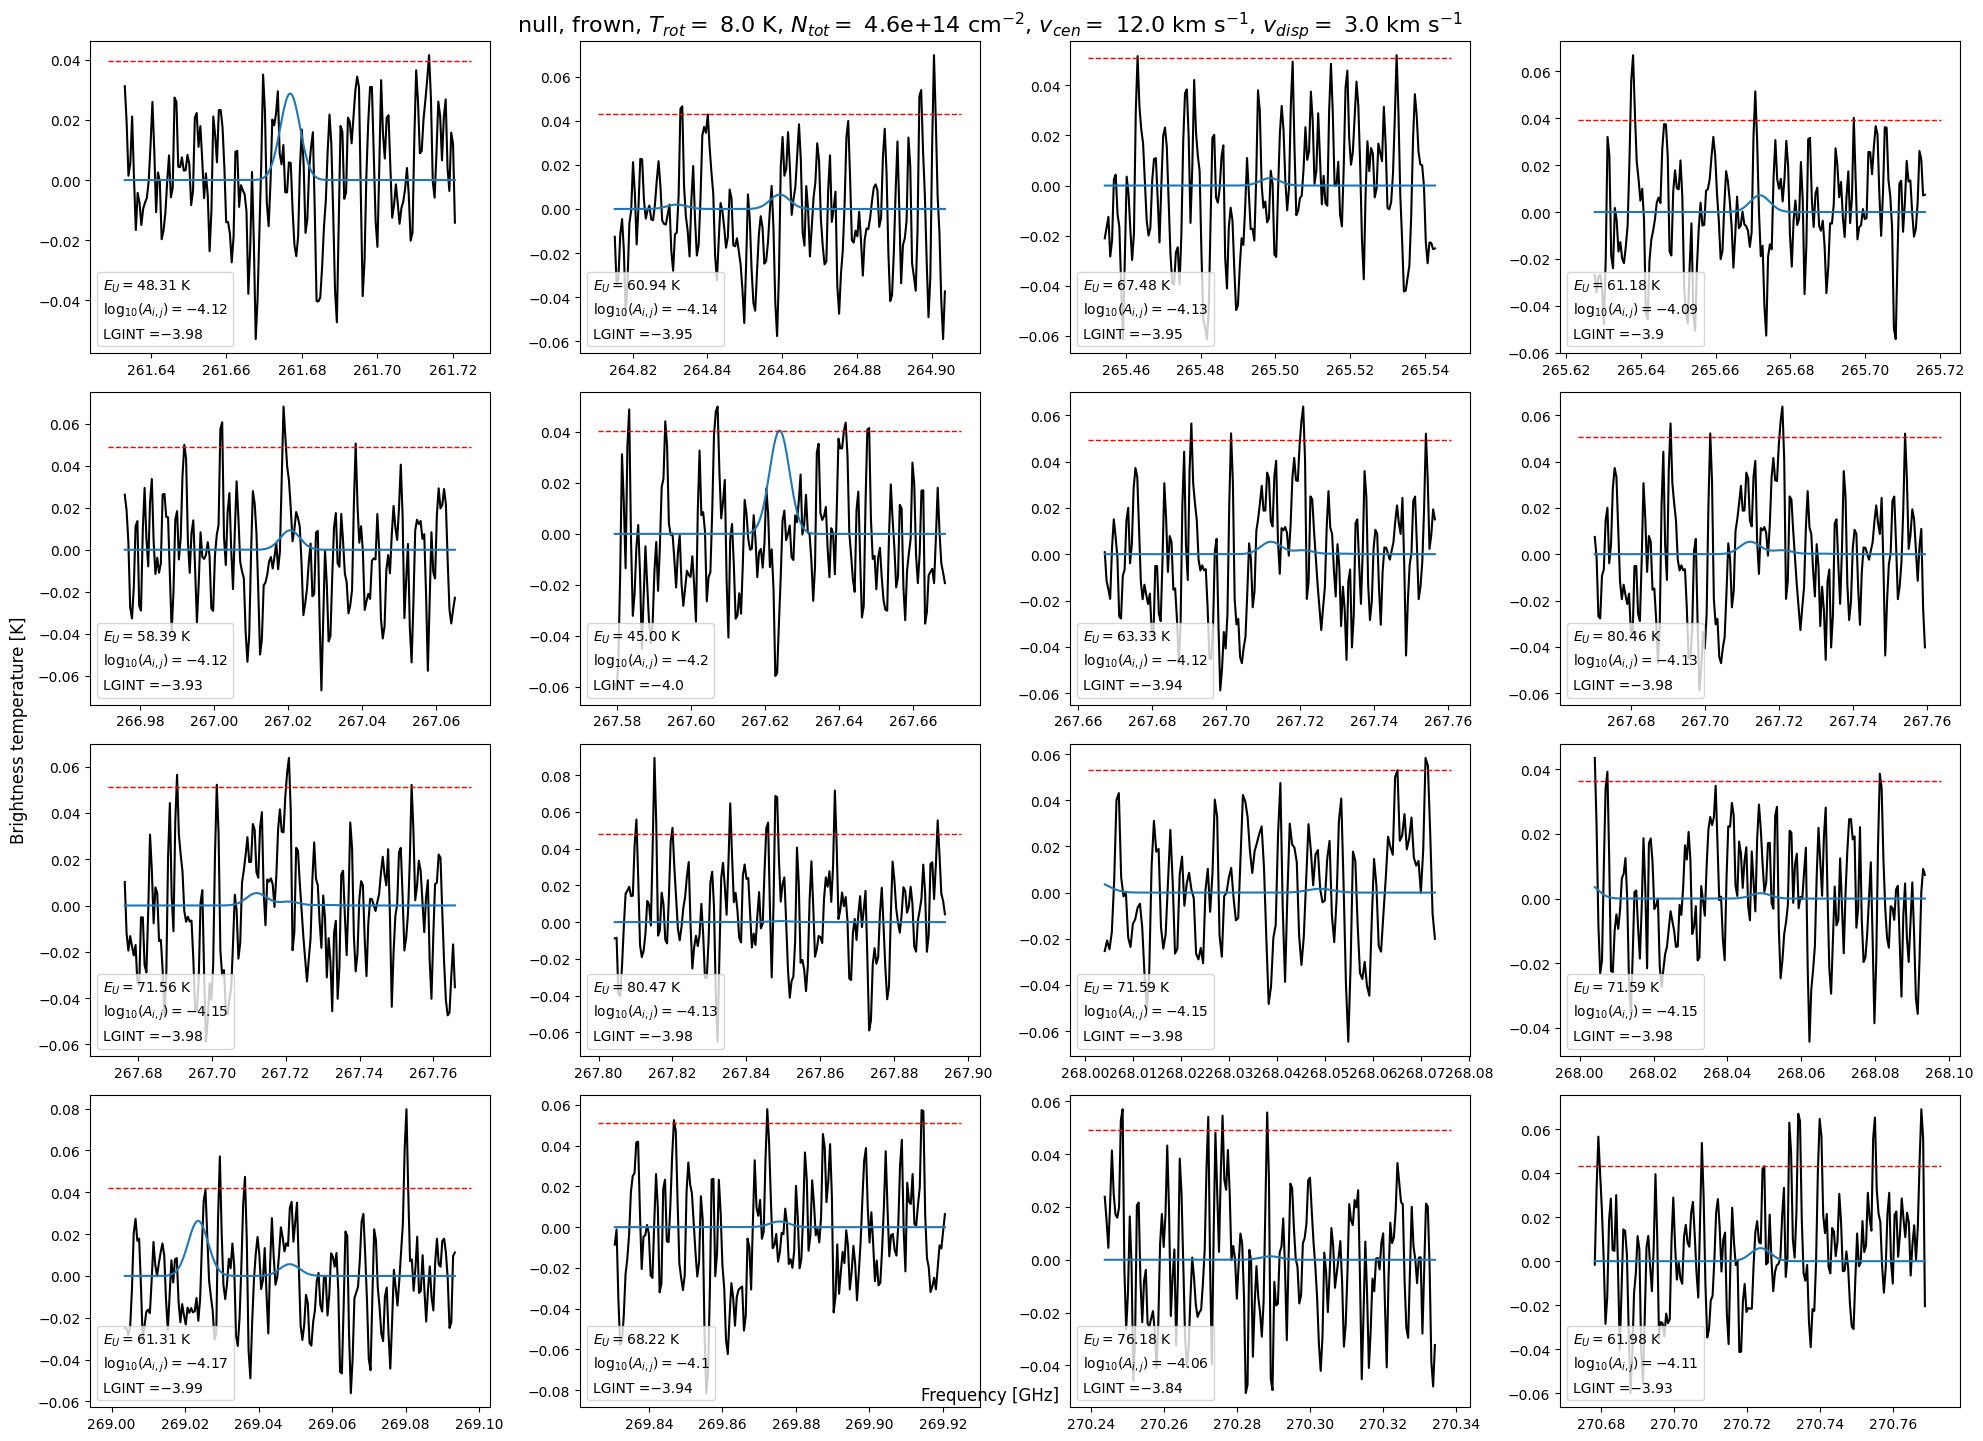

In [29]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 8., N_tot = 4.6e+14, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=15,
                       nrows=4, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=mol_str,
                       extr_type="reg", show_2_sigma=True, return_freqs=True, LGINT_cutoff=-4)

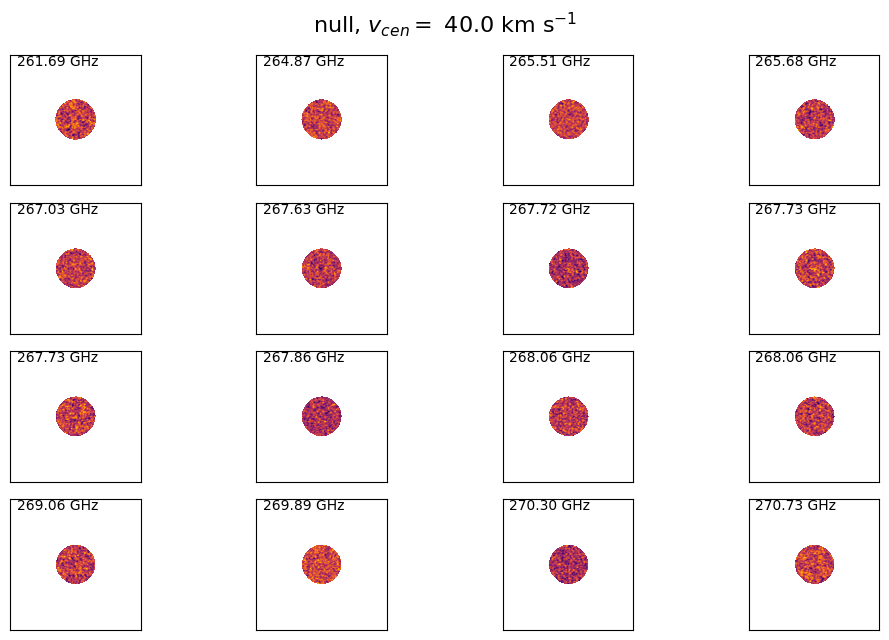

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=4, ncols=4, name_for_plot=mol_str)

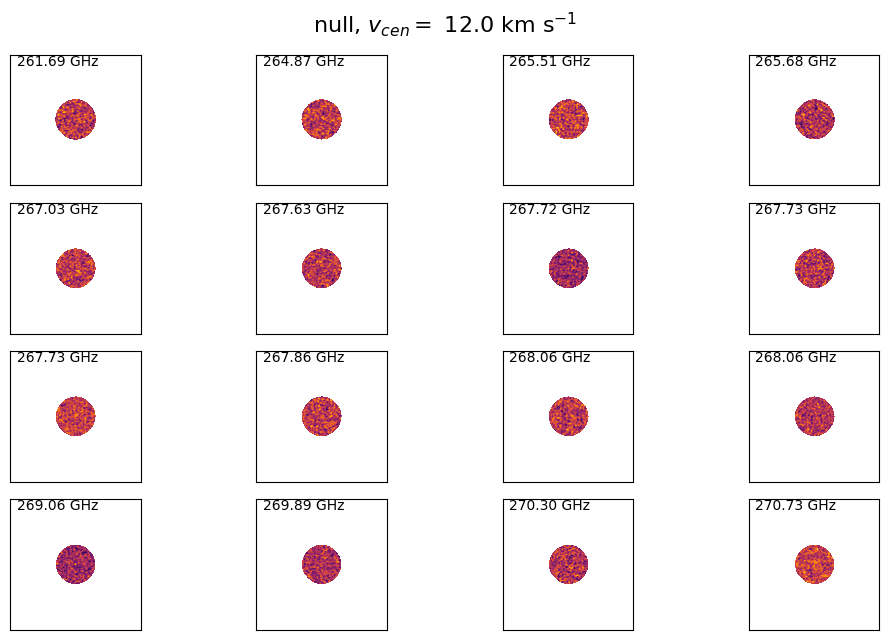

In [11]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=4, ncols=4, name_for_plot=mol_str)